<a href="https://colab.research.google.com/github/megh7a/Probabilistic-Neural-Network-with-Iris-Dataset/blob/main/PNN_using_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. import the needed packages
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt

# 1. Read the data points


my_data = pd.read_csv('iris.csv', sep=',',header=0)
cleaned_data = np.array([ my_data['sepal.length'].tolist(),my_data['sepal.width'].tolist(),my_data['petal.length'].tolist(),my_data['petal.width'].tolist()]).T
# def NormalizeData(my_data):
#     return (my_data - np.min(my_data)) / (np.max(my_data) - np.min(my_data))
#cleaned_data = np.array([ my_data['Feature 1'].tolist(),my_data['Feature 2'].tolist()]).T
#cleaned_data = np.array([ my_data['sepal.length'].tolist(),my_data['sepal.width'].tolist(),my_data['petal.length'].tolist(),my_data['petal.width'].tolist()]).T

print (my_data)
#print (cleaned_data)
print("To show the cleaned data!")

# 2. Declare the needed variable 
groups = my_data.groupby('Class')
number_of_classes = len(groups) 
print(number_of_classes) # Here we have 3 different classes
dictionary_of_sum = {}
numrber_of_features  = 4 # We have sepal length,sepal width,petal length and petal width
sigma = 1
increament_current_row_in_matrix = 0

# 3. Define the point that we wish to classifiy - Clearly it is Red 
#point_want_to_classify = [6.1, 2.3, 4.7, 1.3]

# **INPUT LAYER OF THE PNN **
# 4. Loop via number of classes 

	

     sepal.length  sepal.width  petal.length  petal.width  Class
0             5.1          3.5           1.4          0.2      1
1             4.9          3.0           1.4          0.2      1
2             4.7          3.2           1.3          0.2      1
3             4.6          3.1           1.5          0.2      1
4             5.0          3.6           1.4          0.2      1
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      3
146           6.3          2.5           5.0          1.9      3
147           6.5          3.0           5.2          2.0      3
148           6.2          3.4           5.4          2.3      3
149           5.9          3.0           5.1          1.8      3

[150 rows x 5 columns]
To show the cleaned data!
3


In [ ]:
slen=float(input("Enter the Sepal Length"))
swid=float(input("Enter the Sepal Width"))
plen=float(input("Enter the Petal Length"))
pwid=float(input("Enter the Petal Width"))

Enter the Sepal Length4.4
Enter the Sepal Width3.2
Enter the Petal Length1.5
Enter the Petal Width0.3


In [ ]:
point_want_to_classify = [slen,swid,plen,pwid]
print(point_want_to_classify)

[4.4, 3.2, 1.5, 0.3]


In [ ]:
for k in range(1,number_of_classes+1):

	# 4.1 Initiate the sume to zero 
	dictionary_of_sum[k] = 0
	number_of_data_point_from_class_k = len(groups.get_group(k))

	# ** PATTERN LAYER OF PNN **
	# 5. Loop via the number of training example in class i 
	# 5.1 - Declare a temporary variable to hold the sum of gaussian distribution sum
	temp_summnation = 0.0

	# 6. Loop via number of points in the class - NUMBER OF POINTS IN THE CLASS!
	for i in range(1,number_of_data_point_from_class_k+1):

		# 6.1 - Implementation of getting Gaussians 
		tempp = (point_want_to_classify[0] - cleaned_data[increament_current_row_in_matrix][0]) * (point_want_to_classify[0] - cleaned_data[increament_current_row_in_matrix][0]) 
		tempq = (point_want_to_classify[1] - cleaned_data[increament_current_row_in_matrix][1]) * (point_want_to_classify[1] - cleaned_data[increament_current_row_in_matrix][1]) 
		tempr = (point_want_to_classify[2] - cleaned_data[increament_current_row_in_matrix][2]) * (point_want_to_classify[2] - cleaned_data[increament_current_row_in_matrix][2]) 
		temps = (point_want_to_classify[3] - cleaned_data[increament_current_row_in_matrix][3]) * (point_want_to_classify[3] - cleaned_data[increament_current_row_in_matrix][3]) 
		#print(tempp , tempq ,tempr ,temps)
		temp_sum = -1 * (tempp + tempq +tempr +temps)
		#print(temp_sum)
		temp_sum = temp_sum/( 2 * np.power(sigma,2) )
		#print(temp_sum)
    	
		# 6.2 - Implementation of Sum of Gaussians
		temp_summnation = temp_summnation + temp_sum

		# 6.3 - Increamenting the row of the matrix to get the next data point
		increament_current_row_in_matrix  = increament_current_row_in_matrix + 1

	# 7. Finally - For K class - the Probability of current data point belonging to that class
	dictionary_of_sum[k]  = temp_summnation 


In [ ]:
dictionary_of_sum

{1: -18.164999999999985, 2: -295.67, 3: -627.6699999999998}

The given features  [4.4, 3.2, 1.5, 0.3]  is classified as Setosa
1


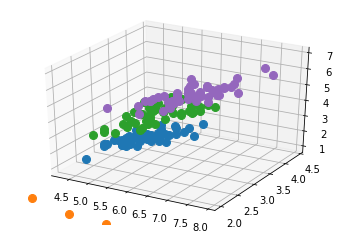

In [ ]:
# 8. Get the classified class 
classified_class = str( max(dictionary_of_sum, key=dictionary_of_sum.get) )
if(classified_class=='1'):
  print("The given features ", point_want_to_classify ," is classified as Setosa")
elif classified_class=='2':
  print("The given features ", point_want_to_classify ," is classified as Versicolor")
elif classified_class=='3':
  print("The given features ", point_want_to_classify ," is classified as Virginica")
print(classified_class)
# 9. Group the data by class 
groups = my_data.groupby('Class')

# Drawing the graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    #print(group['sepal.length'])
    ax.plot(group['sepal.length'], group['sepal.width'], group['petal.length'],group['petal.width'], marker='o', linestyle='', ms=8, label=name)

# Draw the unclassified data point 
#ax.plot(int(point_want_to_classify[0]), int(point_want_to_classify[1]), int(point_want_to_classify[2]),int(point_want_to_classify[3]),marker='o', linestyle='', ms=12, label = 0)

plt.show()